In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [3]:
# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

populations = {'Poland': 37_846_611,
               'Canada': 37_664_517, 
               'Germany': 83_721_496, 
               'United Kingdom': 67_802_690, 
               'US': 330_548_815, 
               'France': 65_239_883, 
               'China': 1_438_027_228,
               'Italy': 60_480_874,
               'Sweden': 10_099_265,
               'Norway': 5_421_241,
               'Spain': 46_750_937,
               'Korea, South': 51_259_999,
               'Slovakia': 5_459_092,
               'Czechia': 10_704_844,
               'Ukraine': 43_787_973,
               'Belarus': 9_449_969,               
              }

countries = list(populations.keys())
df = df[df['Country'].isin(countries)]
v = df.copy()

# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

percapita = covid.copy()
for country in percapita:
    percapita[country] = percapita[country]/populations[country]*100000

rel = covid.pct_change()

v = v.pivot(index='Date', columns='Country', values='Deaths')
vict = v.reset_index('Date')
vict.set_index(['Date'], inplace=True)
vict.columns = countries

victperc = vict.copy()
for country in victperc:
    victperc[country] = victperc[country]/populations[country]*100000

In [4]:
LOGY=True

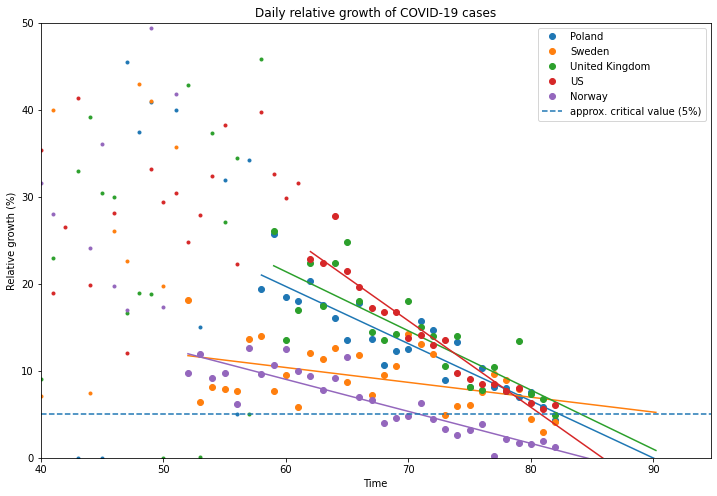

In [5]:
fig = plt.figure(figsize=(12,8))

#selcnt = ['Poland','Sweden','US','Germany','Norway','Italy','Spain']
selcnt = ['Poland','Sweden','United Kingdom', 'US', 'Norway']
#selcnt = ['Poland', 'Germany', 'Sweden', 'Norway', 'Korea, South', 'China', 'US']
#selcnt = ['Poland', 'Germany']
#selcnt = ['Poland', 'Germany', 'Sweden', 'Norway', 'China', 'US']
#selcnt = ['Poland', 'Slovakia', 'Germany', 'Czechia', 'Ukraine', 'Belarus']

for c in selcnt:
    m = ~ (np.isnan(rel[c].values) | np.isinf(rel[c].values))
    t = np.arange(m.size)
    for s, v in zip(t[m][::-1], rel[c].values[m][::-1]):
        if v>0.3 :
            break
    mm = m & (t > s)
    regr.fit(t[mm].reshape(-1,1), rel[c].values[mm])
    p = plt.plot(t[m], 100*rel[c].values[m], '.')[0]
    plt.plot(t[mm], 100*rel[c].values[mm], 'o', color=p.get_color(), label=c)
    x = linspace(t[mm][-s:].min(), 1.1*t[mm][-s:].max(), 100)
    plt.plot(x, 100 * regr.predict(x.reshape(-1,1)), color=p.get_color())
plt.axhline(5, ls='--', label='approx. critical value (5%)')
plt.ylim(0,50)
plt.xlim(40, None)
plt.title('Daily relative growth of COVID-19 cases')
plt.ylabel('Relative growth (%)')
plt.xlabel('Time')
plt.legend();

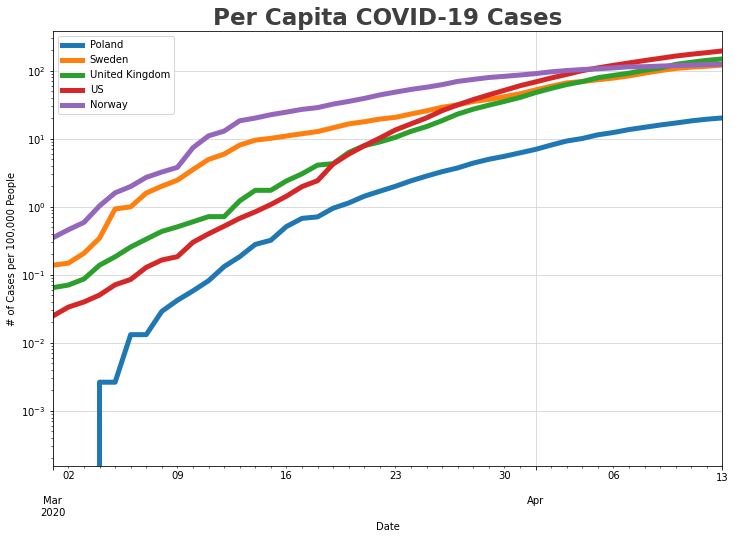

In [6]:
percapitaplot = percapita[selcnt].plot(figsize=(12,8), linewidth=5, logy=LOGY)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
percapitaplot.set_xlim(pd.Timestamp('2020-03-1'),None)
percapitaplot.set_title("Per Capita COVID-19 Cases", 
                        fontsize = 23, weight = 'bold', alpha = .75);

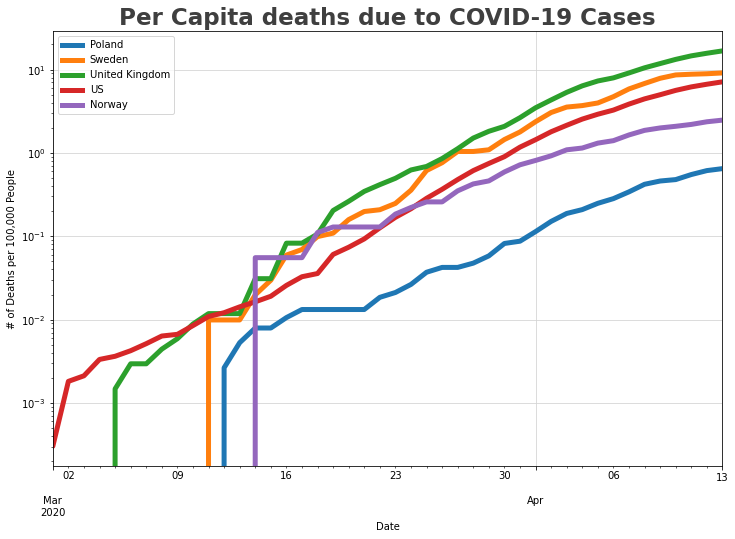

In [7]:
vplot = victperc[selcnt].plot(figsize=(12,8), linewidth=5, logy=LOGY)
vplot.grid(color='#d4d4d4')
vplot.set_xlabel('Date')
vplot.set_ylabel('# of Deaths per 100,000 People')
vplot.set_xlim(pd.Timestamp('2020-03-1'),None)
vplot.set_title("Per Capita deaths due to COVID-19 Cases", fontsize = 23, weight = 'bold', alpha = .75);

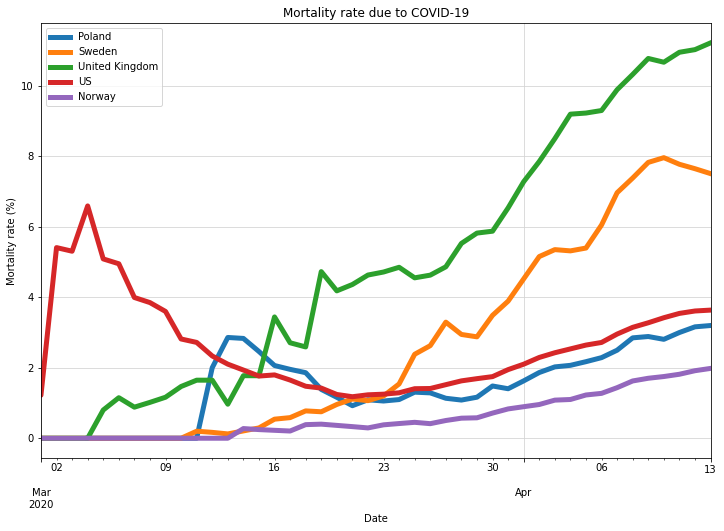

In [8]:
mortplt = (100*victperc[selcnt]/percapita[selcnt]).plot(figsize=(12,8), linewidth=5, logy=False)
mortplt.grid(color='#d4d4d4')
mortplt.set_xlim(pd.Timestamp('2020-03-1'),None)
mortplt.set_xlabel('Date')
mortplt.set_ylabel('Mortality rate (%)')
mortplt.set_title('Mortality rate due to COVID-19');